In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
X_train = pd.read_csv('../data/processed/X_train_l2.csv')
X_test = pd.read_csv('../data/processed/X_test_l2.csv')
y_train_bin = pd.read_csv('../data/processed/y_train_binary.csv')
y_test_bin = pd.read_csv('../data/processed/y_test_binary.csv')

In [20]:
# Binary label mapping
label_map = {
    'normal': 0,
    'attack': 1
}

y_train_bin['binary_label'] = y_train_bin['binary_label'].map(label_map)
y_test_bin['binary_label']  = y_test_bin['binary_label'].map(label_map)

y_train_bin = y_train_bin['binary_label']
y_test_bin  = y_test_bin['binary_label']



In [4]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train_bin.values.ravel())
y_pred_bin=gnb.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

      attack       0.97      0.17      0.30     12833
      normal       0.48      0.99      0.64      9711

    accuracy                           0.53     22544
   macro avg       0.72      0.58      0.47     22544
weighted avg       0.76      0.53      0.45     22544



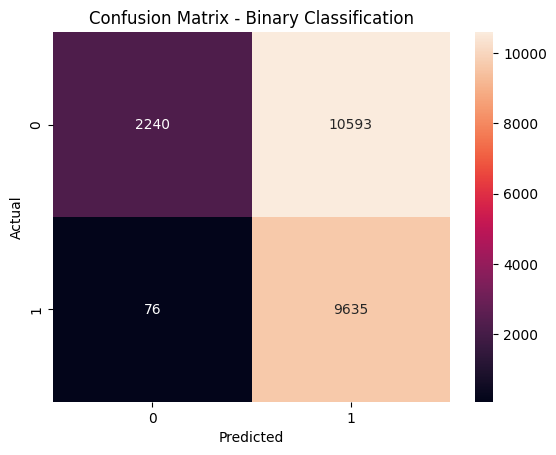

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

y_prob_bin=gnb.predict_proba(X_test)[:,1]

print("Classification Report:\n",classification_report(y_test_bin,y_pred_bin))
cm=confusion_matrix(y_test_bin,y_pred_bin)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Binary Classification')
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc_bin=RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    max_features='sqrt',
    random_state=42)

rfc_bin.fit(X_train,y_train_bin.values.ravel())
y_pred_rfc_bin=rfc_bin.predict(X_test)
y_prob_rfc_bin=rfc_bin.predict_proba(X_test)[:,1]

Classification Report 
               precision    recall  f1-score   support

      attack       0.97      0.63      0.76     12833
      normal       0.67      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544



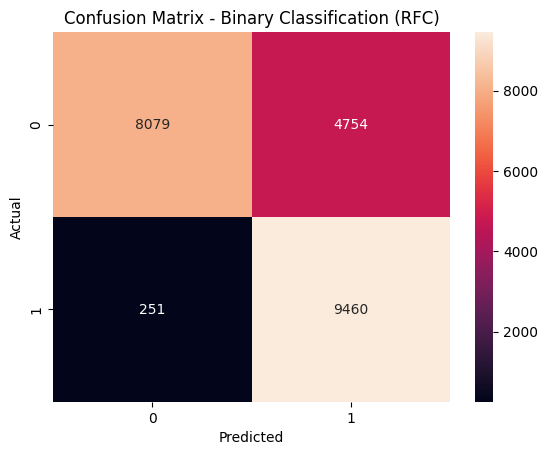

In [7]:
from sklearn.metrics import classification_report,confusion_matrix

print("Classification Report \n" , classification_report(y_test_bin,y_pred_rfc_bin))
cm=confusion_matrix(y_test_bin,y_pred_rfc_bin)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary Classification (RFC)")
plt.show()

In [8]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1.0, random_state=42, max_iter=5000)
svc.fit(X_train, y_train_bin.values.ravel())

y_pred_svc_bin=svc.predict(X_test)
y_prob_svc_bin=svc.decision_function(X_test)

Classification Report 
               precision    recall  f1-score   support

      attack       0.90      0.52      0.66     12833
      normal       0.59      0.92      0.72      9711

    accuracy                           0.70     22544
   macro avg       0.75      0.72      0.69     22544
weighted avg       0.77      0.70      0.69     22544



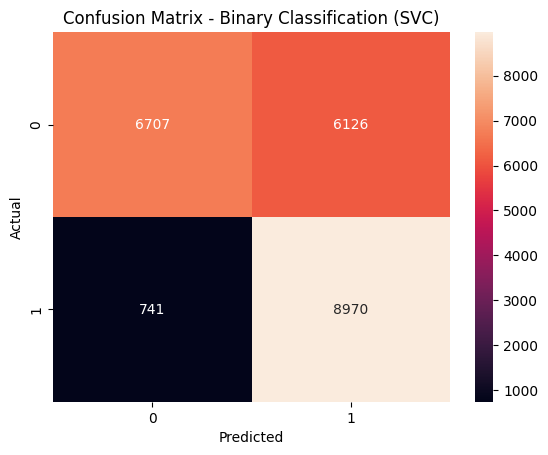

In [9]:
print("Classification Report \n" , classification_report(y_test_bin,y_pred_svc_bin))
cm=confusion_matrix(y_test_bin,y_pred_svc_bin)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary Classification (SVC)")
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train_bin_enc, num_classes=2)
y_test_cat = to_categorical(y_test_bin_enc, num_classes=2)

model_binary = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_binary.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_binary = model_binary.fit(
    X_train,
    y_train_bin,
    validation_data=(X_test, y_test_bin),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/200


C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9453 - loss: 0.1666 - val_accuracy: 0.7749 - val_loss: 0.8150
Epoch 2/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.0850 - val_accuracy: 0.7495 - val_loss: 1.1391
Epoch 3/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0664 - val_accuracy: 0.7603 - val_loss: 1.2770
Epoch 4/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9801 - loss: 0.0569 - val_accuracy: 0.7725 - val_loss: 1.3979
Epoch 5/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0508 - val_accuracy: 0.7767 - val_loss: 1.4019
Epoch 6/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0455 - val_accuracy: 0.7794 - val_loss: 1.3451
Epoch 7/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.7839 - val_loss: 1.3171
Epoch 8/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.7625

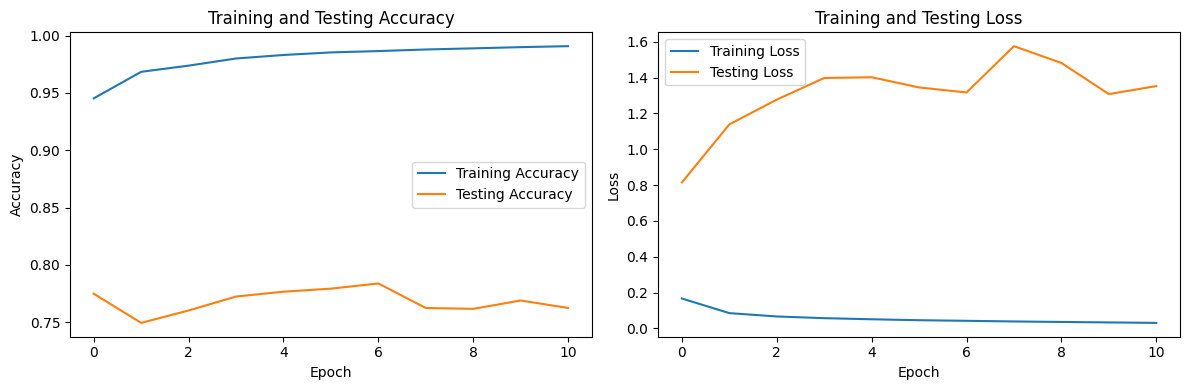

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras.models import load_model
best_model = load_model("best_ann_model.h5")



# Predict probabilities on test set
y_prob_ann = best_model.predict(X_test)

# Convert softmax output to class labels
y_pred_ann = (y_prob_ann >= 0.5).astype(int).ravel()
y_true_ann = y_test_bin.astype(int).values

print("Classification Report:\n",classification_report(y_true_ann, y_pred_ann))

cm = confusion_matrix(y_true_ann, y_pred_ann)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary Classification (ANN)")
plt.show()

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step


ValueError: Found input variables with inconsistent numbers of samples: [22544, 45088]